# lab session: Bayesian Classifiers and Gaussian Mixture Models (GMMs)

### Objective:
- Understand the fundamentals of Bayesian classifiers and GMM and their mathematical basis.

- Implement a Naive Bayes classifier and GMM in Python.



##  Bayesian Classifiers

### Bayes' Theorem  
Bayes' Theorem is the foundation of Bayesian classifiers. It provides a way to update the probability estimate for a hypothesis as additional evidence is observed.

$$
P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}
$$


- **$ P(H|E) $**: Posterior probability (probability of hypothesis $ H $ given the evidence $ E $).

- **$ P(E|H) $**: Likelihood (probability of evidence $ E $ given that $ H $ is true).

- **$ P(H) $**: Prior probability of the hypothesis.

- **$ P(E) $**: Marginal probability of the evidence.

### Naive Bayes Classifier  
The Naive Bayes classifier applies Bayes' Theorem with the assumption of conditional independence between features given the class.

  
Given features $ \mathbf{x} = (x_1, x_2, \dots, x_n) $ and class $ C_k $, the posterior probability of class $ C_k $ is given by:

$$
P(C_k | \mathbf{x}) = \frac{P(\mathbf{x} | C_k) \cdot P(C_k)}{P(\mathbf{x})}
$$

-  $ P(\mathbf{x}) $ is constant for all classes because it represents the overall probability of the evidence $\mathbf{x}$ , independent of any particular class $ C_k $ . It acts as a normalizing factor to ensure that the posterior probabilities sum to 1, but it does not affect the relative comparison of probabilities across different classes. Hence, for the purpose of classification, we can safely ignore it and focus on maximizing $ P(\mathbf{x} | C_k) \cdot P(C_k)$ so:

$$
P(C_k | \mathbf{x}) \propto P(C_k) \prod_{i=1}^n P(x_i | C_k)
$$

- Assumptions: Each feature $ x_i $ is conditionally independent given the class $ C_k $.

## Implementation with Iris Dataset from sklearn

The Iris dataset is a well-known dataset used in pattern recognition and machine learning. It consists of 150 samples from three different species of Iris flowers: **setosa**, **versicolor**, and **virginica**. There are four features (or attributes) recorded for each sample:

1. **Sepal length (in cm)**

2. **Sepal width (in cm)**

3. **Petal length (in cm)**

4. **Petal width (in cm)**

The target variable indicates the species of the flower, with three possible values:
- `0`:  setosa
- `1`:  versicolor
- `2`:  virginica

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a DataFrame
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows of the DataFrame
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:

# Load X and y
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
#TO DO

# Initialize and train the Naive Bayes classifier
# TO DO : Call your GaussianNB
model= GaussianNB()
# TO DO : Fit your model here

# Make predictions and evaluate
#predict your model
#print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

##   Gaussian Mixture Models (GMMs)


A GMM is a probabilistic model that assumes data is generated from a mixture of several Gaussian distributions with unknown parameters.

The probability density function (PDF) of a GMM for $ K $ components is given by:

$$
p(\mathbf{x}) = \sum_{k=1}^K \pi_k \mathbf{N}(\mathbf{x} | \mu_k, \Sigma_k)
$$

- **$ \pi_k $**: Mixing coefficient for the \( k \)-th Gaussian component, where $ \sum_{k=1}^K \pi_k = 1 $ and $ \pi_k \geq 0 $.

- **$ \mathbf{N}(\mathbf{x} | \mu_k, \Sigma_k) $**: Multivariate Gaussian distribution given by:

$$
\mathbf{N}(\mathbf{x} | \mu_k, \Sigma_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp \left( -\frac{1}{2} (\mathbf{x} - \mu_k)^T \Sigma_k^{-1} (\mathbf{x} - \mu_k) \right)
$$

- **$ \mu_k $**: Mean vector of the $ k $-th Gaussian component which defines the center of the distribution.

- **$ \Sigma_k $**: Covariance matrix of the $ k $-th Gaussian component determines the shape and orientation of the distribution


#### Define Parameters for the Multivariate Gaussian Distribution

before diving into Gaussian Mixture Models (GMM), we can demonstrate how to generate and visualize data from a multivariate Gaussian distribution using Python.

 We will use a **mean vector** and a **covariance matrix** to describe our multivariate distribution.

In [13]:
import numpy as np
from scipy.stats import multivariate_normal
np.random.seed(42)

# Mean vector (2D)
mean = [0, 0]

# Covariance matrix (2x2)
covariance = [[2, 1], [1, 2]]

# Number of samples
n_samples = 500

##### Generate Random Samples from the Multivariate Gaussian Distribution

In [14]:
# Generate samples
samples = np.random.multivariate_normal(mean, covariance, n_samples)
#samples

##### Visualize the Distribution of the Samples

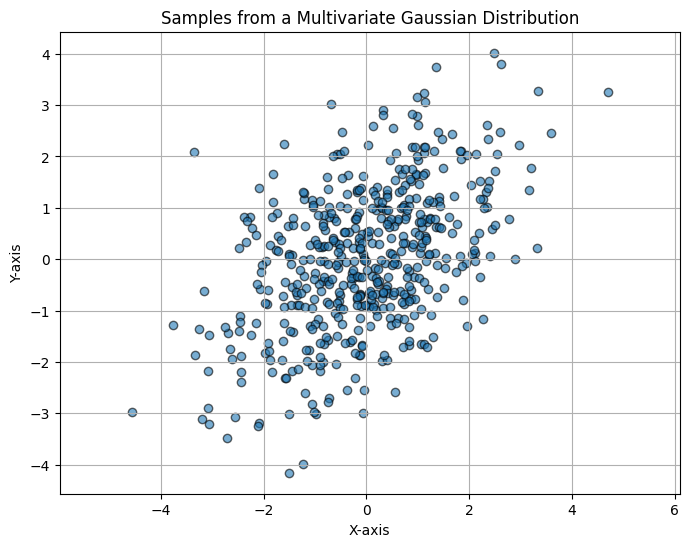

In [15]:
# Plot the samples
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6, edgecolor='k')
plt.title("Samples from a Multivariate Gaussian Distribution")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')  # Equal scaling for both axes
plt.grid(True)
plt.show()


##### Visualize the Contour Plot of the Multivariate Gaussian

To better understand the distribution, let's plot the **contour lines** that represent areas of equal probability density:

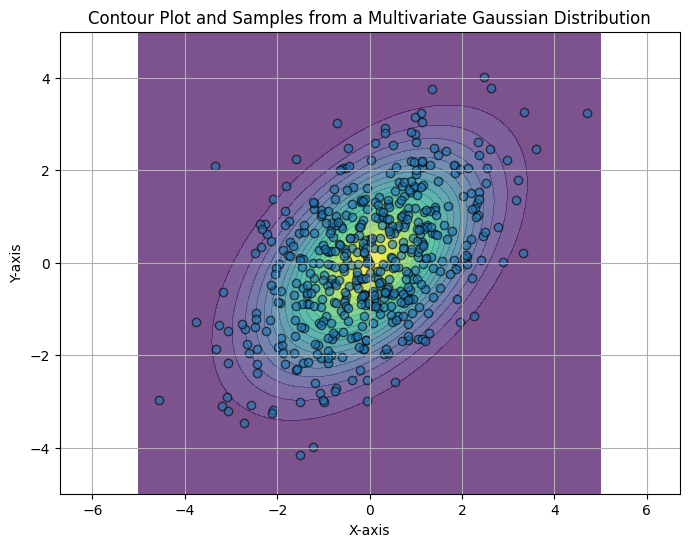

In [16]:
# Define a grid for plotting the contour
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
pos = np.dstack((x, y))

# Compute the multivariate normal distribution
rv = multivariate_normal(mean, covariance)
pdf = rv.pdf(pos)

# Plot the contour
plt.figure(figsize=(8, 6))
plt.contourf(x, y, pdf, levels=20, cmap="viridis", alpha=0.7)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6, edgecolor='k')
plt.title("Contour Plot and Samples from a Multivariate Gaussian Distribution")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.axis('equal')  # Equal scaling for both axes
plt.grid(True)
plt.show()

- The center of the contour plot corresponds to the mean vector of the multivariate Gaussian distribution. It is the point with the highest probability density.


-  the contour lines are circular, so the two variables are uncorrelated and have the same variance. This means the distribution is symmetric around the mean.

## GMM

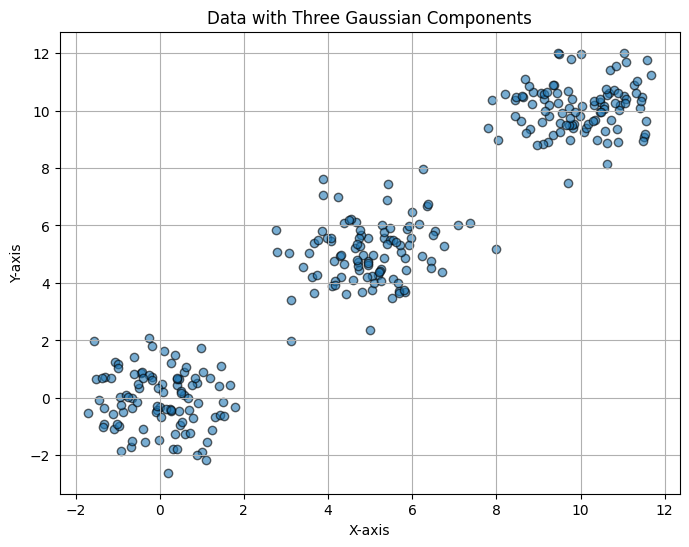

In [19]:
# Generate the samples
component1 = np.random.normal(0, 1, (100, 2))
component2 = np.random.normal(5, 1, (100, 2))
component3 = np.random.normal(10, 1, (100, 2))

# Combine all samples into a single dataset
data = np.vstack([component1, component2, component3])

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 1], data[:, 0], alpha=0.6, edgecolor='k')
plt.title("Data with Three Gaussian Components")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

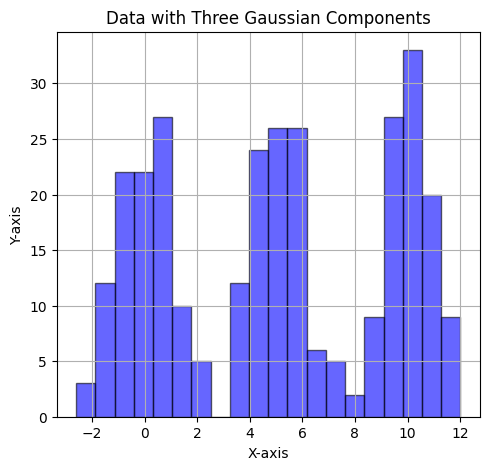

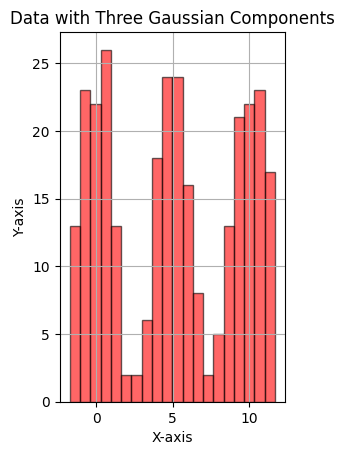

<Figure size 640x480 with 0 Axes>

In [20]:
# Plotting 1D histograms for each dimension
plt.figure(figsize=(12, 5))

# Histogram for the first dimension
plt.subplot(1, 2, 1)
# TO DO
plt.hist(data[:, 0], bins=20, alpha=0.6, color='blue', edgecolor='k')
plt.title("Data with Three Gaussian Components")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

# Histogram for the second dimension
# TO DO
plt.subplot(1, 2, 2)
plt.hist(data[:, 1], bins=20, alpha=0.6, color='red', edgecolor='k')
plt.title("Data with Three Gaussian Components")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()

In [28]:
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(42)

component1 = np.random.normal(0, 1, (100, 2))
component2 = np.random.normal(5, 1, (500, 2))
component3 = np.random.normal(10, 1, (200, 2))

# Combine all samples into a single dataset
data = np.vstack([component1, component2, component3])

# Fit GMM with your components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data)
cluster_labels = gmm.predict(data)

# Show the first 10 predicted labels
print(f"First 10 predicted labels: {cluster_labels[:10]}")
# Show the count of points in each predicted cluster
print(f"Count of points per cluster: {np.bincount(cluster_labels)}")



First 10 predicted labels: [2 2 2 2 2 2 2 2 2 2]
Count of points per cluster: [500 200 100]


In [39]:
# Plotting the results
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [40]:
#### Print the means of the components

#We can now print the mean of each Gaussian component to know the center where
# each Gaussian distribution is located in the feature space.

print("Means of the GMM components:")
print(gmm.means_)

Means of the GMM components:


In [41]:

####  Print the covariance matrices of the components
#Let's see how each component is spread out

print("\nCovariance matrices of the GMM components:")
print(gmm.covariances_)



Covariance matrices of the GMM components:


In [42]:
# Print the predicted labels for the data points
print("\nPredicted labels for each data point:")
print(cluster_labels)


Predicted labels for each data point:


In [43]:
# Print the mixing coefficients
#These coefficients represent the proportion of the dataset that each Gaussian
# component is responsible for. They should sum to 1.

print("\nMixing coefficients (weights) of the components:")
print(gmm.weights_)


Mixing coefficients (weights) of the components:


In [44]:
# Print the log likelihood of the GMM
log_likelihood = gmm.score(data)
print("\nLog likelihood of the model:")
print(log_likelihood)



Log likelihood of the model:


In [45]:
import matplotlib.pyplot as plt

# Plot the data points
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, s=40, cmap='viridis', alpha=0.6, edgecolor='k')

# Plot the means of the components
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, marker='X', label='Means')

plt.title("GMM Clustering with Component Means")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid()
plt.show()


# Assignment

This assignment aims to deepen your understanding of Bayesian Classifiers and Gaussian Mixture Models (GMMs) through practical implementation.


## Part 1: Bayesian Classifiers

1. **Dataset Selection**
   - Consider your project dataset.

2. **Data Preprocessing**
   - Perform necessary data preprocessing steps, including handling missing values, encoding categorical variables, and splitting the data into training and test sets.

3. **Implementation**
   - Implement a Naive Bayes classifier using a library  Scikit-learn (if your project is about classification) or Bayesian Ridge Regressor or another suitable regression model like Linear Regression (if your project is a regression problem). Train the model on your training dataset and evaluate its performance using accuracy, precision, recall, and F1 score ( for classification) or Mean Squared Error (MSE)and $R^2$ score (for regression problem).

4. **Results Interpretation**
   - Analyze and interpret the results of your model. Discuss what the metrics imply about your classifier’s or regressor's performance. Include confusion matrices if necessary.

5. **Reflection**
   - Write a brief reflection  on your experience with Bayesian classifiers or Bayesian Ridge Regressor. Discuss any challenges you faced and how you overcame them. Write it in your notebook using the **Markdown** or **text** cell.



## Part 2: Gaussian Mixture Models (GMMs)

1. **Data Generation**
   - Generate synthetic data using five Gaussian distributions. Plot the data and visualize the distinct clusters.

2. **GMM Implementation**
   - Fit a Gaussian Mixture Model to the generated synthetic data. Print and interpret the means, covariances, and mixing coefficients of the components.

3. **Cluster Assignment**
   - Use the fitted GMM to predict the labels for the data points. Visualize the results by plotting the data points and the GMM components.


4. **Reflection**
   - Write a brief reflection on your experience with GMMs. Discuss any difficulties you encountered during the implementation and how you addressed them.


### Submission Guidelines
- Compile your two tasks into a single document or Jupyter notebook. you can create a new notebook or do it in this notebook ( at the end)

- Ensure that your code is well-documented, with comments explaining key steps.

- Include visualizations as necessary to support your findings.

- **THIS ASSIGNEMNT WILL BE DONE IN GROUP. SUBMIT ONE ASSIGNMENT PER GROUP (SO ONLY ONE PERSON IN THE GROUP WILL SUBMIT) AND ADD ALL GROUP MEMBERS AT THE HEAD OF THE NOTEBOOK**